In [61]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from itertools import combinations 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler

CPU times: user 45 µs, sys: 22 µs, total: 67 µs
Wall time: 70.3 µs


In [62]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
df

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,c_ACC_z_min,c_ACC_z_max,c_Temp_mean,c_Temp_std,c_Temp_min,c_Temp_max,BVP_peak_freq,TEMP_slope,subject,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-0.8700,0.6110,29.168923,0.064290,28.994568,29.426208,0.081425,-0.000253,2,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-0.7594,-0.6810,28.886605,0.074846,28.730682,29.207275,0.147017,-0.000161,2,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-0.7534,-0.6754,28.799659,0.037924,28.679108,28.988800,0.088210,0.000535,2,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-0.7878,0.1660,28.768865,0.058639,28.584656,29.023285,0.117614,-0.000256,2,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-0.7202,-0.6570,28.598514,0.068128,28.447449,28.882599,0.151541,0.000260,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.036762,0.007911,0.000000,0.058485,-0.036741,0.008011,-0.058485,0.008257,-0.000025,5.512148e-06,...,-0.9478,-0.7038,33.943786,0.026213,33.808136,34.097076,0.119876,-0.000075,17,3
781,0.032120,0.005324,0.001376,0.055732,-0.032117,0.005343,-0.055732,0.002752,-0.000022,3.676049e-06,...,-0.9446,-0.7414,33.939625,0.025553,33.753479,34.144348,0.065592,-0.000117,17,3
782,0.026901,0.000517,0.024770,0.028210,-0.026901,0.000517,-0.028210,-0.024770,-0.000019,3.554577e-07,...,-0.9718,-0.7698,34.002778,0.034897,33.864288,34.191650,0.108567,0.000454,17,3


In [63]:
features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)
features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

70


71

In [64]:
sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,c_ACC_z_min,c_ACC_z_max,c_Temp_mean,c_Temp_std,c_Temp_min,c_Temp_max,BVP_peak_freq,TEMP_slope,subject,label
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-0.870000,0.611000,29.168923,0.064290,28.994568,29.426208,0.081425,-0.000253,2.000000,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-0.759400,-0.681000,28.886605,0.074846,28.730682,29.207275,0.147017,-0.000161,2.000000,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-0.753400,-0.675400,28.799659,0.037924,28.679108,28.988800,0.088210,0.000535,2.000000,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-0.787800,0.166000,28.768865,0.058639,28.584656,29.023285,0.117614,-0.000256,2.000000,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-0.720200,-0.657000,28.598514,0.068128,28.447449,28.882599,0.151541,0.000260,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.042130,0.000328,0.040968,0.043696,-0.039802,0.000328,-0.041346,-0.038618,-0.000027,2.254555e-07,...,-0.419116,-0.276862,34.905210,0.030299,34.784758,35.042778,0.164873,-0.000189,11.176097,3
1244,0.039764,0.000271,0.039219,0.039907,0.039764,0.000271,0.039219,0.039907,0.000027,1.862190e-07,...,-0.386909,-0.282661,34.292072,0.026637,34.169402,34.434019,0.131407,-0.000133,13.000000,3
1245,0.041990,0.000231,0.039308,0.043921,0.003807,0.000231,0.001499,0.006112,0.000003,1.590967e-07,...,-0.608181,-0.500244,33.758163,0.023225,33.601703,33.916210,0.142617,-0.000093,9.166227,3
1246,0.040894,0.000132,0.040569,0.041733,0.040894,0.000132,0.040569,0.041733,0.000028,9.076908e-08,...,-0.536437,-0.411297,34.653072,0.034816,34.524100,34.800521,0.137624,0.000187,5.346098,3


In [65]:
# #random oversampling
# ros = RandomOverSampler(random_state=0)
# X, y= ros.fit_resample(df[features_with_sub], df['label'])
# df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
# df_new

In [66]:
# for i in range(len(list(df_new['subject']))):
#         df_new[df_new['subject']][i]=min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-list(df_new[df_new['subject']])[i]))


for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
p_d=pd.read_csv('personal_detail.csv',index_col=0)

In [68]:
df_new_1=df_new.merge(p_d,on='subject')
df_new_1

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,0,27,175,80,0,0,0,0,0,1
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,0,27,175,80,0,0,0,0,0,1
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,0,27,175,80,0,0,0,0,0,1
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,0,27,175,80,0,0,0,0,0,1
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,0,27,175,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.029484,0.002074,0.020918,0.053804,-0.004624,0.002074,-0.015439,0.017447,-0.000003,1.427082e-06,...,1,29,165,55,1,0,0,0,0,0
1244,0.032744,0.000516,0.029211,0.034857,-0.029334,0.000516,-0.031478,-0.025832,-0.000020,3.552867e-07,...,2,29,165,55,1,0,0,0,0,0
1245,0.030006,0.007051,0.002966,0.070357,-0.027424,0.007051,-0.067796,-0.000404,-0.000019,4.851210e-06,...,2,29,165,55,1,0,0,0,0,0
1246,0.031250,0.001534,0.027188,0.038575,-0.031250,0.001534,-0.038575,-0.027188,-0.000022,1.055452e-06,...,2,29,165,55,1,0,0,0,0,0


In [69]:
df_new_1['label'].value_counts()

3    312
2    312
1    312
0    312
Name: label, dtype: int64

In [70]:
features=df_new_1.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)
features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

79


80

In [71]:
train=df_new_1[df_new_1['subject']<=9]
test=df_new_1[df_new_1['subject']>9]

In [54]:
#w
#50-140 100-195
#c-w
#50-56 100-56
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.transform(test[feature])
for i in range (201):
    #print (i)
    et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i ,)
    et.fit(scaled_data_train,train['label'])
    y_pred=et.predict(scaled_data_test)
    #print(classification_report(test['label'],y_pred))
    if ((classification_report(test['label'],y_pred,output_dict=True)['0']['recall'])>.60 and (classification_report(test['label'],y_pred,output_dict=True)['2']['recall'])>.60 and (classification_report(test['label'],y_pred,output_dict=True)['3']['recall'])>.60):
        print(i)
        print(classification_report(test['label'],y_pred))
# et = ExtraTreesClassifier(n_estimators=50, n_jobs=10)
# et.fit(scaled_data_train,train['label'])
# y_pred=et.predict(scaled_data_test)
# print(classification_report(test['label'],y_pred))

3
              precision    recall  f1-score   support

           0       0.84      0.65      0.74       147
           1       0.85      0.93      0.89       161
           2       0.68      0.71      0.69       146
           3       0.72      0.79      0.75       149

    accuracy                           0.77       603
   macro avg       0.77      0.77      0.77       603
weighted avg       0.78      0.77      0.77       603

12
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       147
           1       0.87      0.91      0.89       161
           2       0.61      0.72      0.66       146
           3       0.70      0.70      0.70       149

    accuracy                           0.74       603
   macro avg       0.75      0.74      0.74       603
weighted avg       0.75      0.74      0.74       603

14
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       147
           1 

114
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       147
           1       0.84      0.86      0.85       161
           2       0.59      0.65      0.62       146
           3       0.72      0.73      0.73       149

    accuracy                           0.72       603
   macro avg       0.72      0.71      0.71       603
weighted avg       0.72      0.72      0.72       603

116
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       147
           1       0.91      0.88      0.89       161
           2       0.62      0.77      0.69       146
           3       0.75      0.77      0.75       149

    accuracy                           0.76       603
   macro avg       0.76      0.75      0.75       603
weighted avg       0.77      0.76      0.76       603

121
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       147
         

In [75]:
#W
#1000-66,100-76, 50-28
#c+w
#50-73 100-83
for i in range (101):
    #print (i)
    et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i ,)
    et.fit(train[feature],train['label'])
    y_pred=et.predict(test[feature])
    #print(classification_report(test['label'],y_pred))
    if ((classification_report(test['label'],y_pred,output_dict=True)['0']['recall'])>.45):
        print(i)
        print(classification_report(test['label'],y_pred))

83
              precision    recall  f1-score   support

           0       0.85      0.48      0.61       147
           1       0.90      0.88      0.89       161
           2       0.51      0.74      0.60       146
           3       0.71      0.72      0.71       149

    accuracy                           0.71       603
   macro avg       0.74      0.70      0.70       603
weighted avg       0.75      0.71      0.71       603



In [57]:
et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56 ,)
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.transform(test[feature])
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       147
           1       0.90      0.92      0.91       161
           2       0.65      0.79      0.71       146
           3       0.76      0.74      0.75       149

    accuracy                           0.77       603
   macro avg       0.77      0.77      0.77       603
weighted avg       0.77      0.77      0.77       603



In [58]:
d=[]
for i in range(len(feature)):
     d.append([feature[i],list(et.feature_importances_)[i]*100])
d.sort(key=lambda x: x[1])
d

[['ACC_y_std', 0.0],
 ['ACC_z_std', 0.0],
 ['EDA_smna_min', 0.0],
 ['smoker_YES', 0.35926809389201736],
 ['BVP_mean', 0.3715718871751929],
 ['gender_ female', 0.3891733112006235],
 ['bmi', 0.4424305391239755],
 ['ACC_y_max', 0.503485857594942],
 ['ACC_y_min', 0.5045322775178077],
 ['ACC_z_min', 0.6297372723633826],
 ['c_ACC_x_min', 0.6615906209489002],
 ['Resp_mean', 0.6646232142323656],
 ['coffee_today_YES', 0.6686427175251872],
 ['ACC_z_mean', 0.67593309185163],
 ['ECG_mean', 0.7115604759955233],
 ['ACC_y_mean', 0.7142481690072271],
 ['sport_today_YES', 0.7332283369528014],
 ['c_ACC_z_std', 0.7564623718730891],
 ['c_Temp_std', 0.7588110550001993],
 ['ECG_std', 0.7675586065855474],
 ['feel_ill_today_YES', 0.7829618182245967],
 ['ACC_z_max', 0.8103755654454617],
 ['ECG_max', 0.8498394607104357],
 ['TEMP_min', 0.8592659641963167],
 ['weight', 0.8595848916663413],
 ['c_ACC_x_std', 0.8631160928960235],
 ['EDA_tonic_std', 0.8964292654952796],
 ['c_ACC_x_mean', 0.8998566424063473],
 ['c_ACC

Current size: [30.0, 10.0]


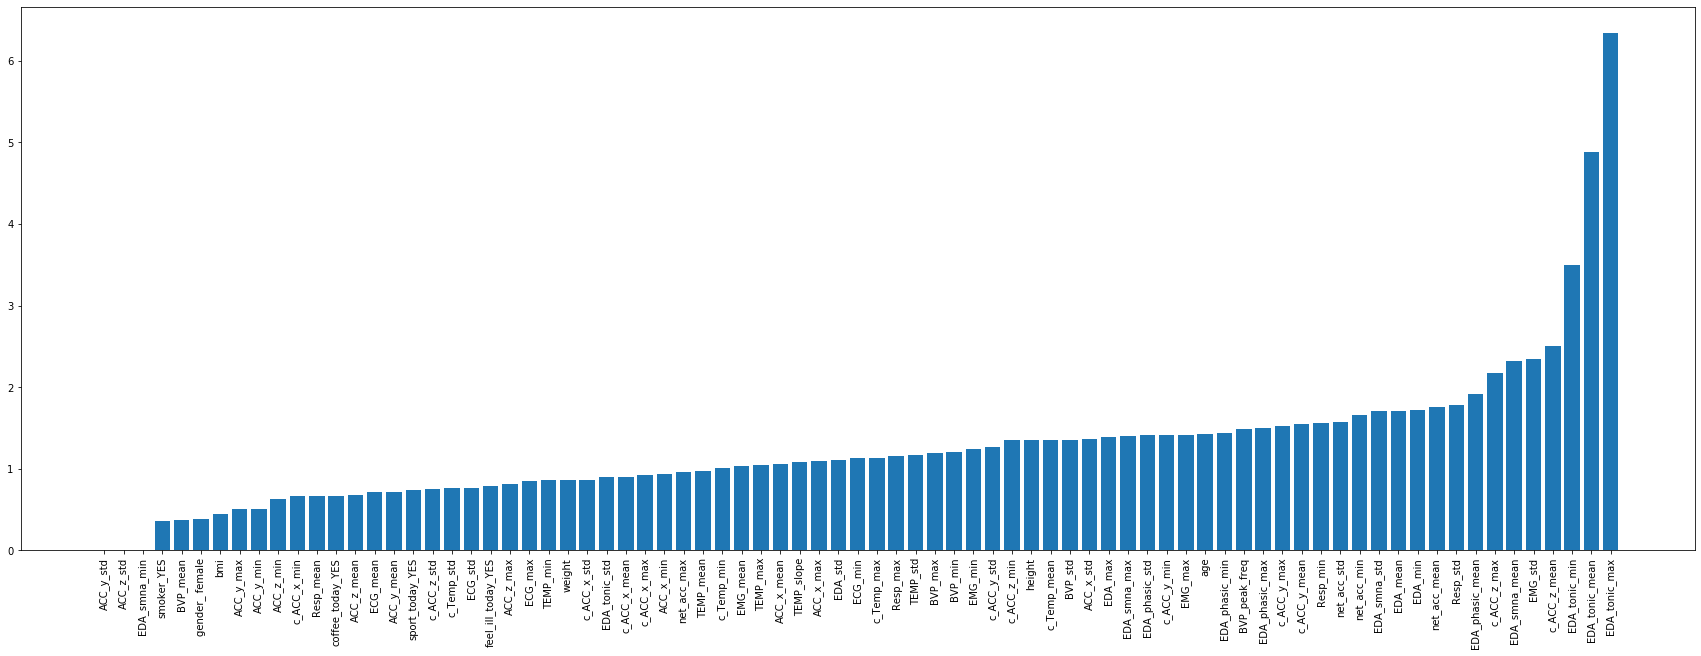

<Figure size 360x1080 with 0 Axes>

In [60]:
names = []
values = []
for i in d:
    names.append(i[0])
    values.append(i[1])
plt.bar(names, values)
plt.xticks(rotation=90)
plt.figure(figsize=(5,15))
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [17]:
classification_report(test['label'],y_pred,output_dict=True)['0']['recall']>

0.5510204081632653